# Draw Confusion Matrix
draw confusion martrix from saved .pt file.  
Notice: you should change the gait_cycle, sampling, and pref_path keyword first, then run all cells.

In [11]:
import torch 

gait_cycle = 'Filter trained by whole'

# pref_path = "/workspace/project/logs/phasemix/3dcnn_True_mix_2dcnn/2025-01-13/18-38-11/best_preds"
# pref_path = "/workspace/project/logs/phasemix/3dcnn_True_whole_2dcnn/2025-01-14/07-44-31/best_preds"
pref_path = "/workspace/project/logs/phasemix/3dcnn_True_whole_2dcnn/2025-01-25/15-58-23/best_preds" # whole 2 
# pref_path = "/workspace/project/logs/phasemix/3dcnn_True_stance_2dcnn/2025-01-13/18-38-11/best_preds"
# pref_path = "/workspace/project/logs/phasemix/3dcnn_True_swing_2dcnn/2025-01-13/18-38-11/best_preds"

# label = torch.load(f"{pref_path}/resnet_{sampling}_1_label.pt")
# pred = torch.load(f"{pref_path}/resnet_{sampling}_1_pred.pt")
label = torch.load(f"{pref_path}/0_label.pt")
pred = torch.load(f"{pref_path}/0_pred.pt")

/tmp/ipykernel_3537944/343870886.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  label = torch.load(f"{pref_path}/0_label.pt")
/tmp/ipykernel_3537944/343870886.py:14: F

In [12]:
# class label balance

a = 0
b = 0
c = 0 

for i in label:
    if i == 0:
        a += 1
    elif i == 1:
        b += 1
    elif i == 2:
        c += 1

print(a, b, c)

1981 2246 1728


****************************************************************************************************
fold0
accuracy: tensor(0.3825)
precision: tensor(0.7729)
recall: tensor(0.3825)
f1: tensor(0.2648)


/tmp/ipykernel_3537944/1902163210.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pred = torch.load(f"{pref_path}/{i}_pred.pt")
/tmp/ipykernel_3537944/1902163210.py:27:

aurroc: tensor(0.7605)
confusion_matrix: tensor([[0.9955, 0.0045, 0.0000],
        [0.8798, 0.1202, 0.0000],
        [0.9682, 0.0000, 0.0318]])
####################################################################################################


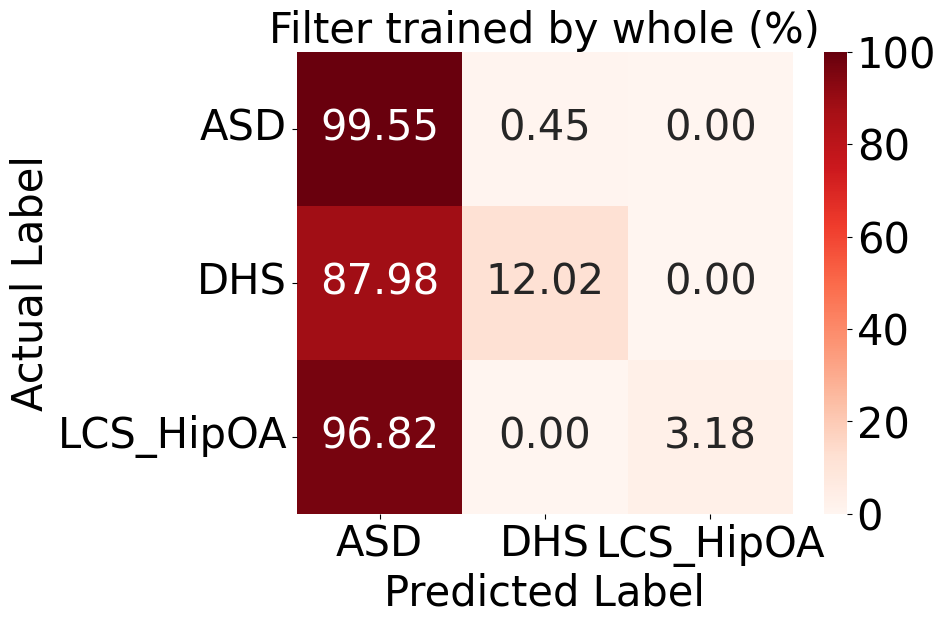

/tmp/ipykernel_3537944/1902163210.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pred = torch.load(f"{pref_path}/{i}_pred.pt")
/tmp/ipykernel_3537944/1902163210.py:27:

****************************************************************************************************
fold1
accuracy: tensor(0.7367)
precision: tensor(0.7936)
recall: tensor(0.7367)
f1: tensor(0.7425)
aurroc: tensor(0.9368)
confusion_matrix: tensor([[0.7560, 0.0453, 0.1986],
        [0.4463, 0.4783, 0.0753],
        [0.0212, 0.0031, 0.9756]])
####################################################################################################


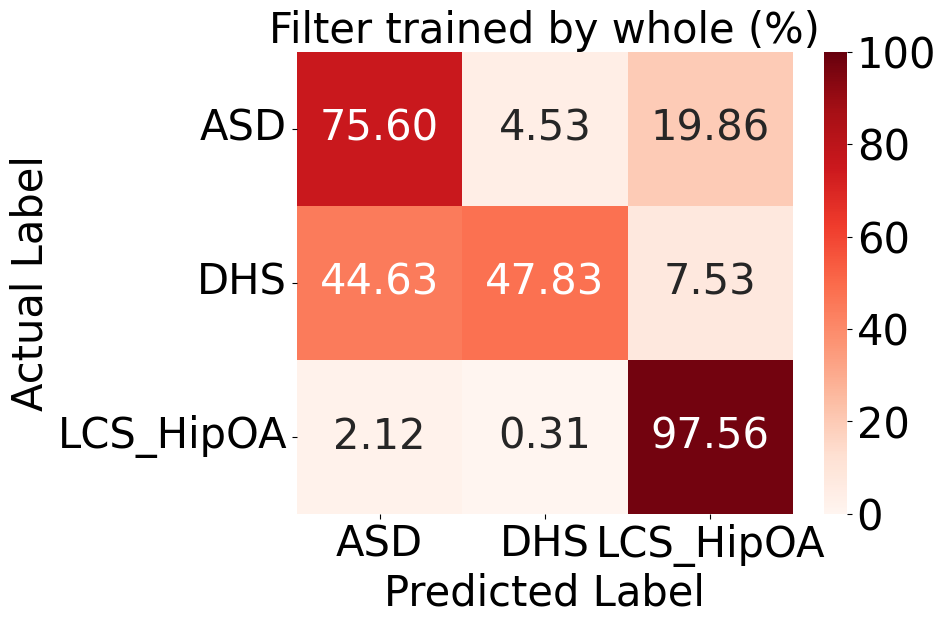

/tmp/ipykernel_3537944/1902163210.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pred = torch.load(f"{pref_path}/{i}_pred.pt")
/tmp/ipykernel_3537944/1902163210.py:27:

****************************************************************************************************
fold2
accuracy: tensor(0.6548)
precision: tensor(0.8008)
recall: tensor(0.6548)
f1: tensor(0.6282)
aurroc: tensor(0.9219)
confusion_matrix: tensor([[0.9802, 0.0162, 0.0036],
        [0.7714, 0.1996, 0.0289],
        [0.2144, 0.0010, 0.7846]])
####################################################################################################


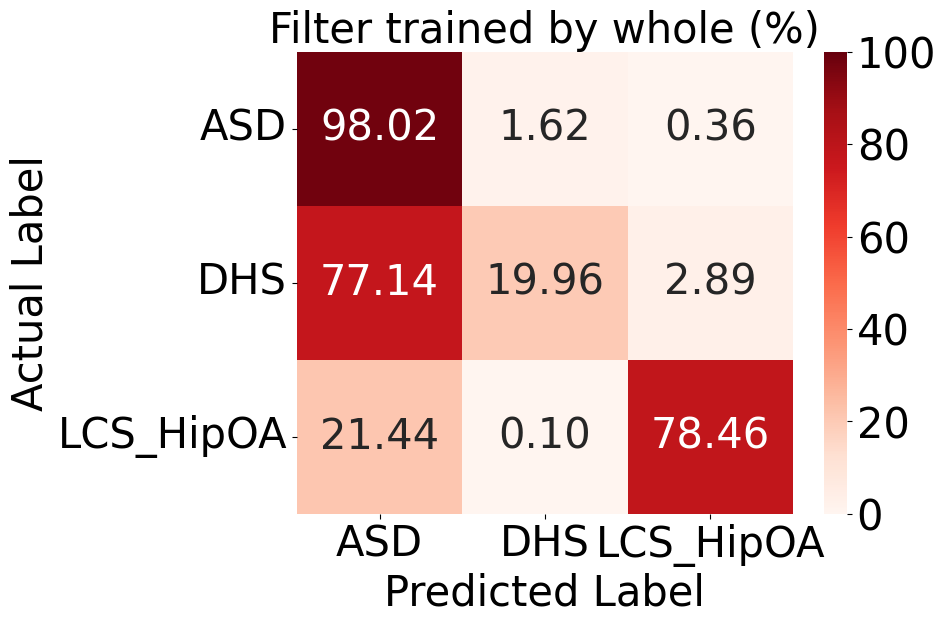

In [13]:
from torchmetrics.classification import (
    MulticlassAccuracy,
    MulticlassPrecision,
    MulticlassRecall,
    MulticlassF1Score,
    MulticlassConfusionMatrix,
    MulticlassAUROC,
)
import matplotlib.pyplot as plt
import seaborn as sns

# define metrics 
num_class = 3
_accuracy = MulticlassAccuracy(num_class)
_precision = MulticlassPrecision(num_class)
_recall = MulticlassRecall(num_class)
_f1_score = MulticlassF1Score(num_class)
_auroc = MulticlassAUROC(num_class)
_confusion_matrix = MulticlassConfusionMatrix(num_class, normalize="true")

for i in range(3):
    
	# label = torch.load(f"{pref_path}/resnet_{sampling}_{i}_label.pt")
	# pred = torch.load(f"{pref_path}/resnet_{sampling}_{i}_pred.pt")
	
	pred = torch.load(f"{pref_path}/{i}_pred.pt")
	label = torch.load(f"{pref_path}/{i}_label.pt").long()

	print('*' * 100)
	print(f"fold{i}")
	print('accuracy: %s' % _accuracy(pred, label))
	print('precision: %s' % _precision(pred, label))
	print('recall: %s' % _recall(pred, label))
	print('f1: %s' % _f1_score(pred, label))
	print('aurroc: %s' % _auroc(pred, label))
	print('confusion_matrix: %s' % _confusion_matrix(pred, label))
	print('#' * 100)

	# 设置字体和标题样式
	plt.rcParams.update({'font.size': 30, 'font.family': 'sans-serif'})

	# 假设的混淆矩阵数据
	confusion_matrix_data = _confusion_matrix(pred, label).cpu().numpy() * 100

	axis_labels = ['ASD', 'DHS', 'LCS_HipOA']

	# 使用matplotlib和seaborn绘制混淆矩阵
	plt.figure(figsize=(8, 6))
	sns.heatmap(confusion_matrix_data, annot=True, fmt='.2f', cmap='Reds', xticklabels=axis_labels, yticklabels=axis_labels, vmin=0, vmax=100)
	plt.title(f'{gait_cycle} (%)', fontsize=30)
	plt.ylabel('Actual Label', fontsize=30)
	plt.xlabel('Predicted Label', fontsize=30)
	plt.show()

In [14]:
# load all fold 
all_label = []
all_pred = []	

for i in range(3):
	# label = torch.load(f"{pref_path}/resnet_{sampling}_{i}_label.pt")
	# pred = torch.load(f"{pref_path}/resnet_{sampling}_{i}_pred.pt")
	pred = torch.load(f"{pref_path}/{i}_pred.pt")
	label = torch.load(f"{pref_path}/{i}_label.pt").long()
	all_label.append(label)
	all_pred.append(pred)
	

/tmp/ipykernel_3537944/3989301287.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pred = torch.load(f"{pref_path}/{i}_pred.pt")
/tmp/ipykernel_3537944/3989301287.py:9: F

In [15]:
len(all_label), all_label[0].shape

(3, torch.Size([5955]))

In [16]:
all_label = torch.cat(all_label)
all_pred = torch.cat(all_pred)

In [17]:
all_label.shape, all_pred.shape

(torch.Size([19688]), torch.Size([19688, 3]))

****************************************************************************************************
Filter trained by whole
accuracy: tensor(0.6144)
precision: tensor(0.7552)
recall: tensor(0.6144)
f1_score: tensor(0.5984)
aurroc: tensor(0.8739)
_confusion_matrix: tensor([[0.9051, 0.0230, 0.0718],
        [0.7141, 0.2541, 0.0318],
        [0.3144, 0.0016, 0.6840]])
####################################################################################################


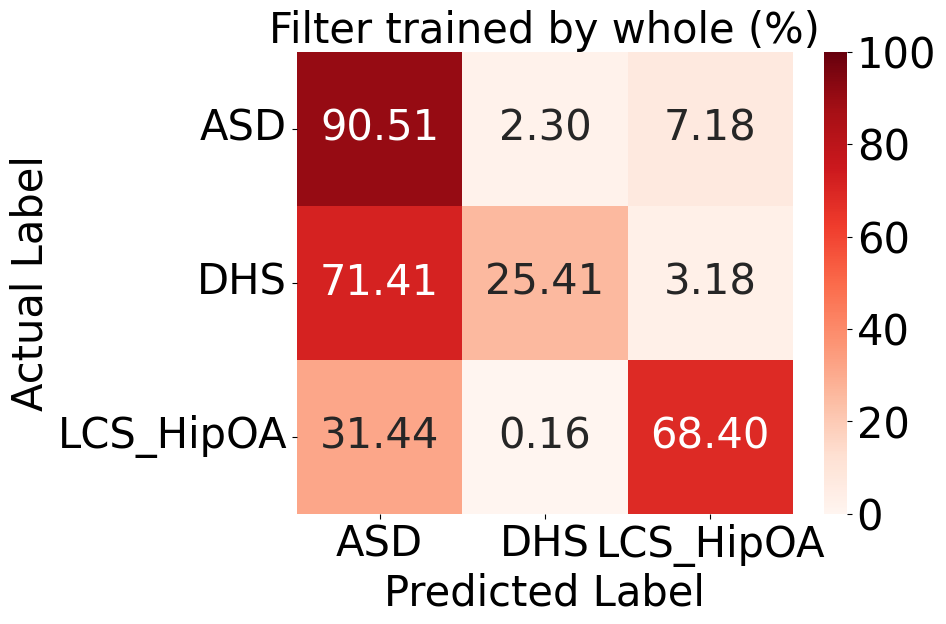

In [18]:
from torchmetrics.classification import (
    MulticlassAccuracy,
    MulticlassPrecision,
    MulticlassRecall,
    MulticlassF1Score,
    MulticlassConfusionMatrix,
    MulticlassAUROC,
)

# define metrics 
num_class = 3
_accuracy = MulticlassAccuracy(num_class)
_precision = MulticlassPrecision(num_class)
_recall = MulticlassRecall(num_class)
_f1_score = MulticlassF1Score(num_class)
_auroc = MulticlassAUROC(num_class)
_confusion_matrix = MulticlassConfusionMatrix(num_class, normalize="true")


print('*' * 100)
print(f'{gait_cycle}')
print('accuracy: %s' % _accuracy(all_pred, all_label))
print('precision: %s' % _precision(all_pred, all_label))
print('recall: %s' % _recall(all_pred, all_label))
print('f1_score: %s' % _f1_score(all_pred, all_label))
print('aurroc: %s' % _auroc(all_pred, all_label))
print('_confusion_matrix: %s' % _confusion_matrix(all_pred, all_label))
print('#' * 100)

# _accuracy = MulticlassAccuracy(num_class, average='micro')
# _precision = MulticlassPrecision(num_class, average='micro')
# _recall = MulticlassRecall(num_class, average='micro')
# _f1_score = MulticlassF1Score(num_class, average='micro')
# _confusion_matrix = MulticlassConfusionMatrix(num_class, normalize="true", )


# print('*' * 100)
# print('micro')
# print('accuracy: %s' % _accuracy(all_pred, all_label))
# print('precision: %s' % _precision(all_pred, all_label))
# print('_binary_recall: %s' % _recall(all_pred, all_label))
# print('_binary_f1: %s' % _f1_score(all_pred, all_label))
# print('_confusion_matrix: %s' % _confusion_matrix(all_pred, all_label))
# print('#' * 100)


import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体和标题样式
plt.rcParams.update({'font.size': 30, 'font.family': 'sans-serif'})

# 假设的混淆矩阵数据
confusion_matrix_data = _confusion_matrix(all_pred, all_label).cpu().numpy() * 100

axis_labels = ['ASD', 'DHS', 'LCS_HipOA']

# 使用matplotlib和seaborn绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_data, annot=True, fmt='.2f', cmap='Reds', xticklabels=axis_labels, yticklabels=axis_labels, vmin=0, vmax=100)
plt.title(f'{gait_cycle} (%)', fontsize=30)
plt.ylabel('Actual Label', fontsize=30)
plt.xlabel('Predicted Label', fontsize=30)
plt.show()

# Draw CM by self

In [19]:
import torch 

# this result from mmaction2 ckpt.
cm = torch.tensor(
    [
		[60.28, 17.92, 21.80],
		[33.68, 63.00, 3.32],
		[0.51, 3.08, 96.41],
	]
)


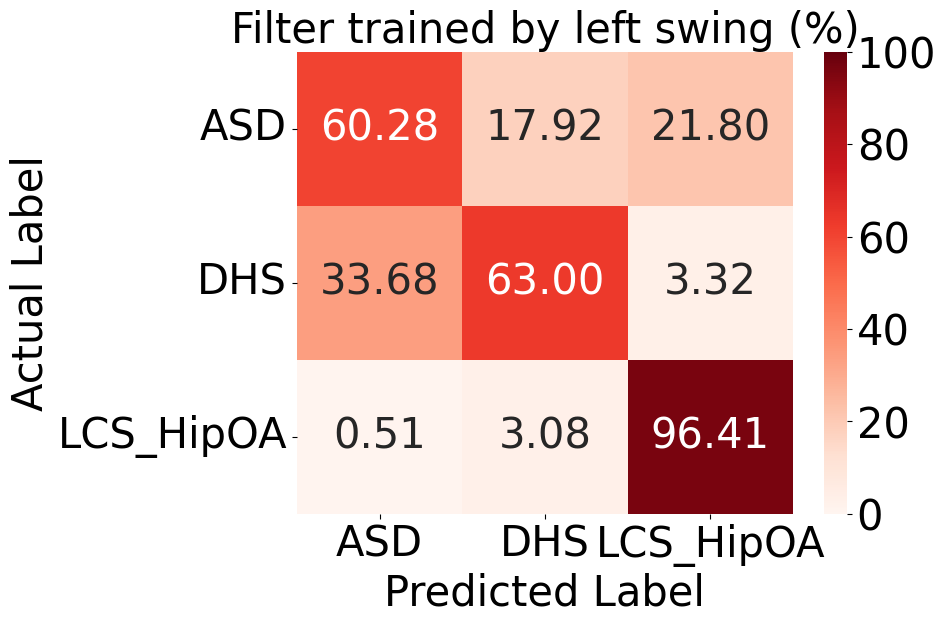

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体和标题样式
plt.rcParams.update({'font.size': 30, 'font.family': 'sans-serif'})

# 假设的混淆矩阵数据
confusion_matrix_data = cm.cpu().numpy()

axis_labels = ['ASD', 'DHS', 'LCS_HipOA']

# 使用matplotlib和seaborn绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_data, annot=True, fmt='.2f', cmap='Reds', xticklabels=axis_labels, yticklabels=axis_labels, vmin=0, vmax=100)
plt.title(f'Filter trained by left swing (%)', fontsize=30)
plt.ylabel('Actual Label', fontsize=30)
plt.xlabel('Predicted Label', fontsize=30)
plt.show()